# WIP: Validation Curve Plot

_Paragraph here explaining the validation curve and its potential outcomes_

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_validation_curve(param_range, train_scores, test_scores, **kwargs):
    
    plot_labels = {
        'training_label': 'Training Score',
        'test_label': 'Test Score',
        'x_label': 'Paramter',
        'y_label': 'Score',
    }
    
    for key in kwargs:
        if key in plot_labels:
            plot_labels[key] = kwargs[key]
            
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(
    param_range,
    train_mean,
    color='blue',
    marker='o',
    markersize=5,
    label=plot_labels['training_label'],
    )
    plt.fill_between(
        param_range,
        train_mean + train_std,
        train_mean - train_std,
        alpha=0.15,
        color='blue',
    )
    plt.plot(
        param_range,
        test_mean,
        color='green',
        linestyle='--',
        marker='s',
        markersize=5,
        label=plot_labels['test_label'],
    )
    plt.fill_between(
        param_range,
        test_mean + test_std,
        test_mean - test_std,
        alpha=0.15,
        color='green'
    )
    plt.grid()
    plt.legend(loc='lower right')
    plt.xlabel(plot_labels['x_label'])
    plt.ylabel(plot_labels['y_label'])
    plt.ylim([0.5, 1.0])
    plt.show()

In [29]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    StratifiedKFold,
    validation_curve,
)


iris = load_iris()
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
clf = RandomForestClassifier(max_depth=10, random_state=42)

In [30]:
param_range = np.linspace(1, 10, 10).astype(int)
train_scores, test_scores = validation_curve(
    estimator=clf,
    X=iris.data,
    y=iris.target,
    param_range=param_range,
    param_name='n_estimators',
    cv=cv,
    scoring='accuracy',
)

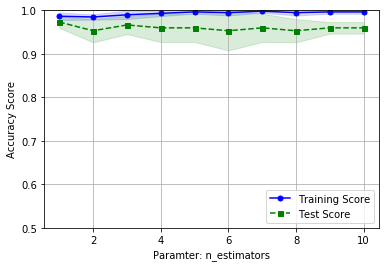

In [33]:
plot_validation_curve(train_scores, test_scores, y_label='Accuracy Score', x_label='Paramter: n_estimators')